Prophet model from facebook to be used in time series analysis

In [1]:
# import librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df= pd.read_csv("DailyDelhiClimateTrain.csv", index_col= "date", parse_dates=True)
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [4]:
df.shape

(1462, 4)

In [5]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [6]:
df.columns

Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

<Axes: xlabel='date', ylabel='meantemp'>

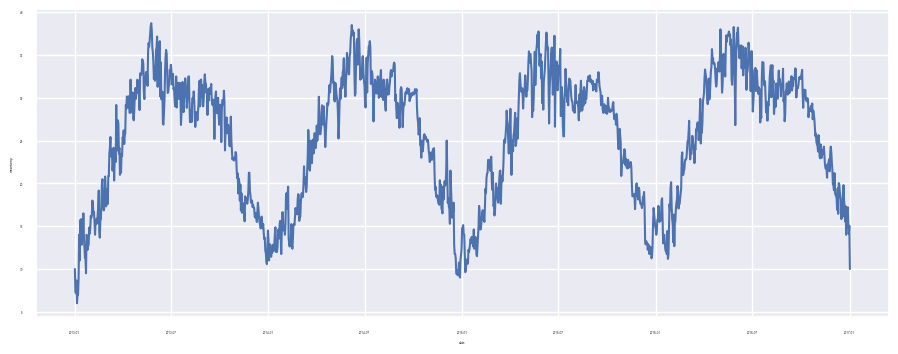

In [8]:
sns.set(rc={"figure.figsize": (11,4)}, font_scale=0.2, style="darkgrid")
sns.lineplot(data=df, x="date", y="meantemp")

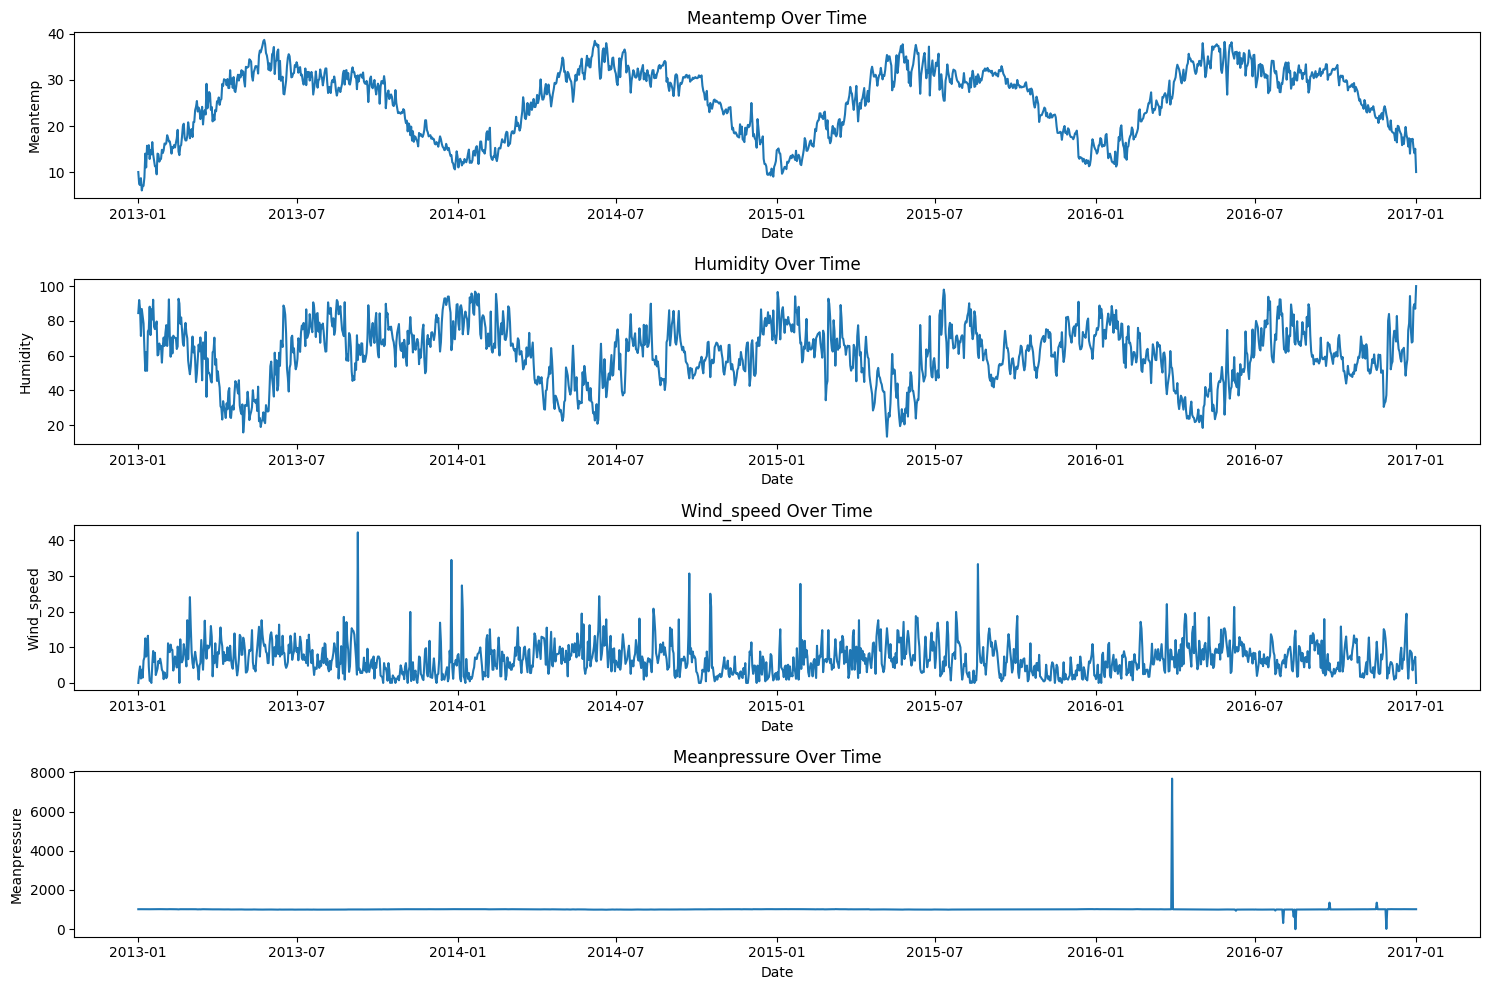

In [7]:
# Create a line plot for each feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns, 1):
    plt.subplot(4, 1, i)
    sns.lineplot(x=df.index, y=df[col])
    plt.title(f'{col.capitalize()} Over Time')
    plt.xlabel('Date')
    plt.ylabel(col.capitalize())
plt.tight_layout()
plt.show()


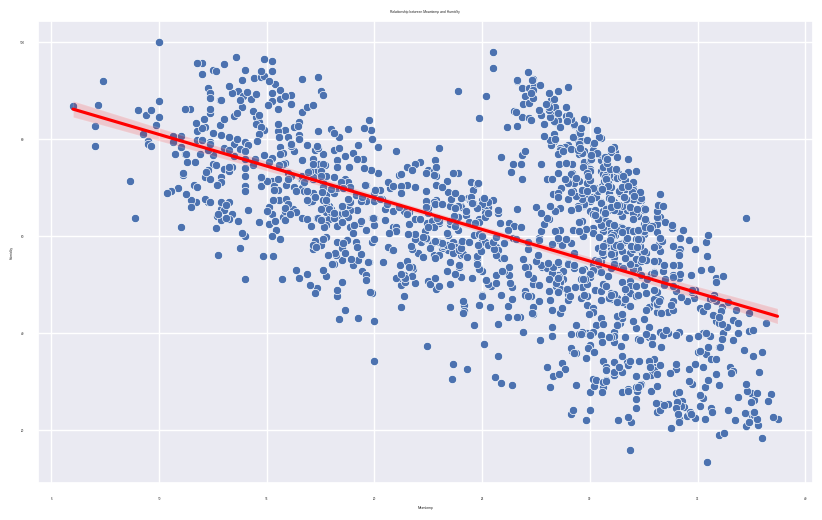

In [10]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='meantemp', y='humidity', data=df)
sns.regplot(x='meantemp', y='humidity', data=df, scatter=False, line_kws={'color': 'red'})
plt.title('Relationship between Meantemp and Humidity')
plt.xlabel('Meantemp')
plt.ylabel('Humidity')
plt.show()


In [11]:
# Calculate Pearson correlation between temperature and humidity
print(f"Pearson correlation between temperature and humidity: {df['meantemp'].corr(df['humidity']):.2f}")


Pearson correlation between temperature and humidity: -0.57


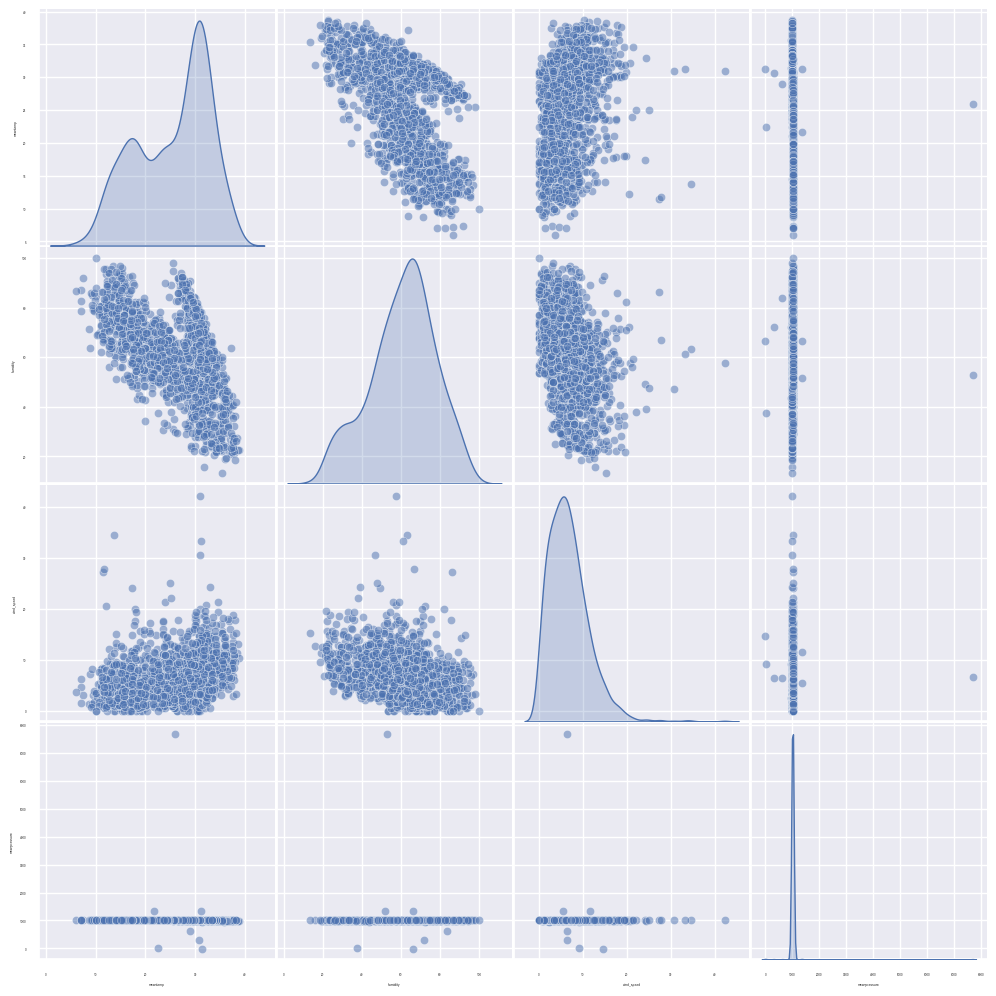

In [28]:
sns.pairplot(df, kind='scatter', plot_kws={'alpha':0.5}, diag_kind='kde')

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'meantemp'),
  Text(0, 1.5, 'humidity'),
  Text(0, 2.5, 'wind_speed'),
  Text(0, 3.5, 'meanpressure')])

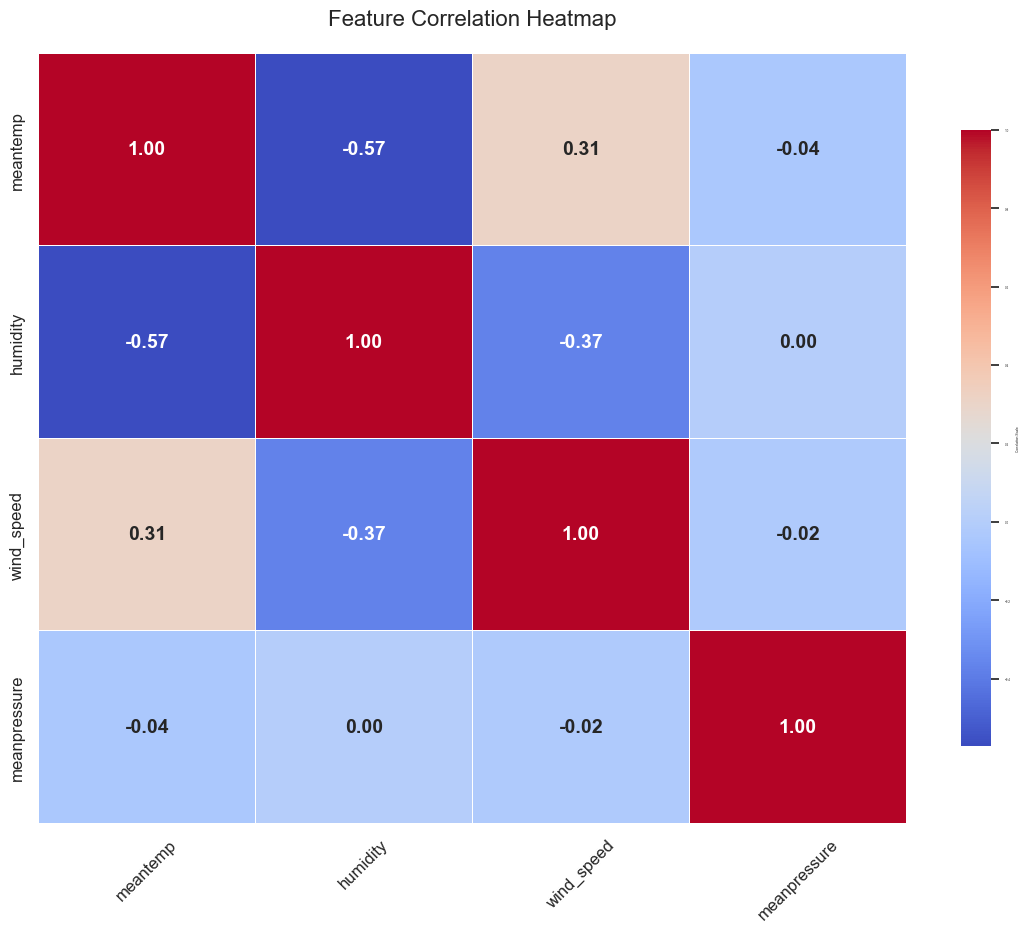

In [24]:
plt.figure(figsize=(14, 10))  # Slightly larger figure for better visibility
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', 
            annot_kws={'size': 14, 'weight': 'bold'},  # Larger, bolder annotations
            fmt='.2f',  # Ensure two decimal places for readability
            linewidths=0.5,  # Add subtle grid lines
            cbar_kws={'shrink': 0.8, 'label': 'Correlation Scale'})  # Clear colorbar label
plt.title('Feature Correlation Heatmap', fontsize=16, pad=20)  # More descriptive title with padding
plt.xticks(fontsize=12, rotation=45)  # Larger x-axis labels
plt.yticks(fontsize=12)  # Larger y-axis labels

In [18]:
# Scale features using Standardization and Normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Create scaled DataFrames (preserve original data)
df_standardized = pd.DataFrame(standard_scaler.fit_transform(df), 
                              columns=df.columns, 
                              index=df.index)

df_normalized = pd.DataFrame(minmax_scaler.fit_transform(df), 
                            columns=df.columns, 
                            index=df.index)

# Display first 5 rows of standardized data
print("Standardized Data:")
print(df_standardized.head())

# Display first 5 rows of normalized data
print("\nNormalized Data:")
print(df_normalized.head())


Standardized Data:
            meantemp  humidity  wind_speed  meanpressure
date                                                    
2013-01-01 -2.109500  1.415439   -1.491699      0.025321
2013-01-02 -2.463454  1.862828   -0.838196      0.037162
2013-01-03 -2.495219  1.564569   -0.475626      0.041972
2013-01-04 -2.291015  0.630022   -1.221233      0.033647
2013-01-05 -2.654044  1.554627   -0.680303      0.029946

Normalized Data:
            meantemp  humidity  wind_speed  meanpressure
date                                                    
2013-01-01  0.122271  0.820957    0.000000      0.132603
2013-01-02  0.042795  0.907591    0.070583      0.132881
2013-01-03  0.035662  0.849835    0.109743      0.132994
2013-01-04  0.081514  0.668867    0.029212      0.132799
2013-01-05  0.000000  0.847910    0.087636      0.132712


In [19]:
df_normalized.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,0.595933,0.546868,0.161113,0.132009
std,0.224614,0.193709,0.108044,0.023460
min,0.000000,0.000000,0.000000,0.000000
25%,0.393013,0.426774,0.082307,0.130770
50%,0.663755,0.568276,0.147363,0.131679
75%,0.773540,0.679094,0.218812,0.132509
max,1.000000,1.000000,1.000000,1.000000


In [20]:
df_standardized.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1.462000e+03,1.462000e+03,1.462000e+03,1.462000e+03
mean,-1.458022e-17,1.968330e-16,-1.944029e-16,-5.880689e-16
std,1.000342e+00,1.000342e+00,1.000342e+00,1.000342e+00
min,-2.654044e+00,-2.824109e+00,-1.491699e+00,-5.628829e+00
25%,-9.037230e-01,-6.201833e-01,-7.296443e-01,-5.286224e-02
50%,3.020541e-01,1.105528e-01,-1.273107e-01,-1.410365e-02
75%,7.909894e-01,6.828386e-01,5.342114e-01,2.131517e-02
max,1.799551e+00,2.340044e+00,7.766988e+00,3.701076e+01


[Text(0, 0.5, 'meantemp'),
 Text(0, 1.5, 'humidity'),
 Text(0, 2.5, 'wind_speed'),
 Text(0, 3.5, 'meanpressure')]

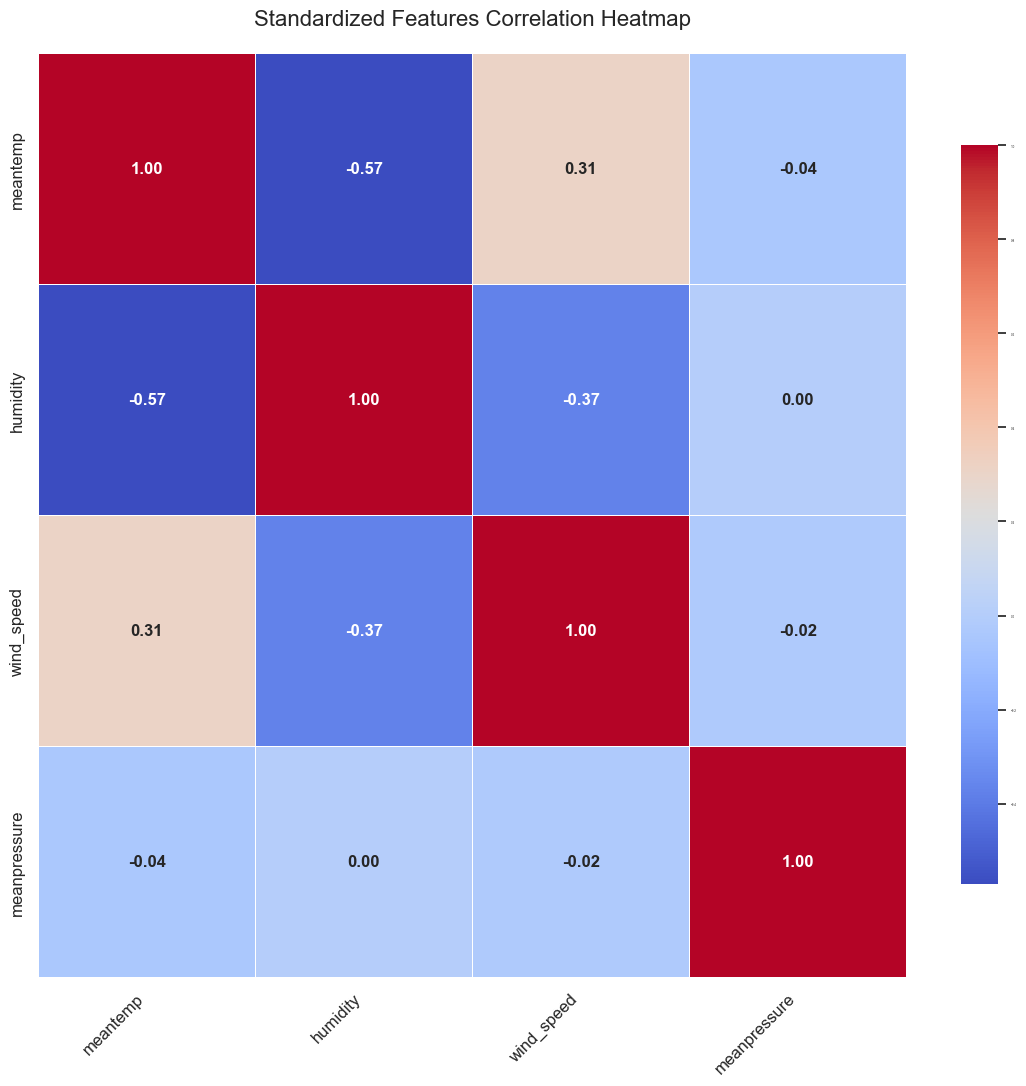

In [23]:
# Create correlation heatmap for standardized features
plt.figure(figsize=(14, 12))  # Increased figure size
heatmap = sns.heatmap(
    df_standardized.corr(), 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f',
    annot_kws={'size': 12, 'weight': 'bold'},  # Larger, bolder annotations
    linewidths=0.5,  # Add separation between cells
    linecolor='white',  # Improve cell distinction
    cbar_kws={'shrink': 0.8}  # Better color bar sizing
)
plt.title('Standardized Features Correlation Heatmap', fontsize=16, pad=20)  # Larger title
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right', fontsize=12)  # Adjust x-axis labels
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=12)  # Adjust y-axis labels


In [ ]:
# First, examine the outliers in meanpressure
plt.figure(figsize=(10, 6))
plt.boxplot(df['meanpressure'])
plt.title('Box Plot of meanpressure')
plt.ylabel('Pressure (hPa)')
plt.show()

# Filter out the outliers in meanpressure
# A reasonable range for atmospheric pressure at sea level is ~950-1050 hPa
df_cleaned = df.copy()
pressure_mask = (df_cleaned['meanpressure'] > 950) & (df_cleaned['meanpressure'] < 1050)
outliers = df_cleaned[~pressure_mask]

print(f"Number of outliers in meanpressure: {len(outliers)}")
print("Example outliers:")
print(outliers.head())

# Replace outliers with median or interpolated values
median_pressure = df_cleaned[pressure_mask]['meanpressure'].median()
df_cleaned.loc[~pressure_mask, 'meanpressure'] = median_pressure

# Alternatively, use interpolation (better for time series)
# df_cleaned['meanpressure'] = df_cleaned['meanpressure'].mask(~pressure_mask).interpolate(method='time')

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Option 1: Min-Max Scaling (scale to 0-1 range)
min_max_scaler = MinMaxScaler()
df_minmax = pd.DataFrame(min_max_scaler.fit_transform(df_cleaned), 
                         columns=df_cleaned.columns,
                         index=df_cleaned.index)

# Option 2: Standardization (mean=0, std=1)
std_scaler = StandardScaler()
df_standardized = pd.DataFrame(std_scaler.fit_transform(df_cleaned),
                               columns=df_cleaned.columns,
                               index=df_cleaned.index)

# Display the normalized dataframes
print("Min-Max Scaled Data:")
print(df_minmax.head())
print("\nStandardized Data:")
print(df_standardized.head())